In [1]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

#### Функции

In [2]:
# Диаграмма нулей и полюсов
def ZerosPolesDiagram(z, p):
    fg, ax = plt.subplots(figsize=(5, 5))
    circle = plt.Circle(xy=(0,0),radius=1, edgecolor='gray', facecolor='white', linestyle='--')
    ax.add_patch(circle)
    ax.scatter(z.real, z.imag, marker='o', facecolor='white', edgecolor='C0', s=100)
    ax.scatter(p.real, p.imag, marker='x', s=100)
    ax.axhline(y=0, color="black", linestyle="-")
    ax.axvline(x=0, color="black", linestyle="-")
    ax.grid()
    plt.show()

# # Расчет АЧХ
def FrequencyResponse(h):
    with np.errstate(divide='ignore'): # suppress RuntimeWarning: divide by zero encountered in log10
        return 20 * np.log10(abs(h))

# # Расчет ФЧХ
def PhaseResponse(h):
    return np.unwrap(np.angle(z=h, deg=False))

# Графики АЧХ и ФЧХ
def FRPRDiagram(w, fr, pr, **kwargs):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5), layout='constrained')

    ax[0].plot(w, fr, 'b')
    ax[0].set_ylabel('Амплитуда, дБ', color='b')
    ax[0].set_xlabel('Частота, рад')
    ax[0].grid(True)

    ax[1].plot(w, pr, 'g')
    ax[1].set_ylabel('Фаза, рад', color='g')
    ax[1].set_xlabel('Частота, рад')
    ax[1].grid(True)

    if 'title' in kwargs.keys():
        fig.suptitle(kwargs['title'])

    if 'ylimits' in kwargs.keys():
        ax[0].set_ylim(kwargs['ylimits'])

    if 'xvlines' in kwargs.keys():
        for xvline in kwargs['xvlines']:
            for axis in ax:
                axis.axvline(x=xvline, color='gray', linestyle='dashed', linewidth=1.5)
    
    plt.show()

#### Исходные данные

In [3]:
# Исходные данные

# Коэффициенты прямых связей
b = [1., 42., 861., 11480., 111930., 850668., 5245786., 26978328., 118030185., 445891810.,
         4280561376., 11058116888., 25518731280., 52860229080., 98672427616., 166509721602., 254661927156., 353697121050., 446775310800., 513791607420., 
         538257874440., 513791607420., 446775310800., 353697121050., 254661927156., 166509721602., 98672427616., 52860229080., 25518731280., 11058116888.,
         4280561376., 1471442973., 445891810., 118030185., 26978328., 5245786., 850668., 111930., 11480., 861.,
         42., 1.]

# Коэффициенты обратных связей
a = [1., 28.564472, 374.643346, 2971.545067, 15757.394255, 57994.369857, 147065.600832, 236961.733887, 157498.920874, -241359.648883, -686264.848217,
         -457785.358215, 576981.040839, 1126714.235668, 74660.052315, -1207023.812941, -594721.019857, 900161.022022, 688961.197236, -574934.231254, -499335.576344,
         359015.254939, 251604.140937, -216133.018013, -75411.146432, 108399.702958, -2039.354539, -36544.744896, 13925.582477, 4607.873351, -5473.240326,
         1521.823091, 325.945847, -434.297544, 188.971371, -51.705055, 9.918839, -1.368413, 0.134204, -0.008935, 0.000364, -0.000007]

# Коэффициенты секций второго порядка [b0,b1,b2,a0,a1,a2], где b - коэффициенты прямых связей, a - коэффициенты обратных связей
s = [[1.,2.,1.,1.,1.269470,-0.403013],
     [1.,2.,1.,1.,1.271593,-0.405359],
     [1.,2.,1.,1.,1.275847,-0.410061],
     [1.,2.,1.,1.,1.282253,-0.417141],
     [1.,2.,1.,1.,1.290838,-0.426629],
     [1.,2.,1.,1.,1.301639,-0.438566],
     [1.,2.,1.,1.,1.314704,-0.453005],
     [1.,2.,1.,1.,1.330089,-0.470009],
     [1.,2.,1.,1.,1.347859,-0.489649],
     [1.,2.,1.,1.,1.368089,-0.512007],
     [1.,2.,1.,1.,1.390863,-0.537176],
     [1.,2.,1.,1.,1.416272,-0.565258],
     [1.,2.,1.,1.,1.444414,-0.596361],
     [1.,2.,1.,1.,1.475397,-0.630603],
     [1.,2.,1.,1.,1.509332,-0.668108],
     [1.,2.,1.,1.,1.546333,-0.709001],
     [1.,2.,1.,1.,1.586517,-0.753412],
     [1.,2.,1.,1.,1.629999,-0.801468],
     [1.,2.,1.,1.,1.676889,-0.853291],
     [1.,2.,1.,1.,1.727286,-0.908990],
     [1.,2.,1.,1.,1.781274,-0.968657]]

# Коэффициенты секций второго порядка [b0,b1,b2,a0,a1,a2], где b - коэффициенты прямых связей, a - коэффициенты обратных связей
# Последний коэффициент (A2) с инвертированным знаком
s = [[1.,2.,1.,1.,1.269470,0.403013],
     [1.,2.,1.,1.,1.271593,0.405359],
     [1.,2.,1.,1.,1.275847,0.410061],
     [1.,2.,1.,1.,1.282253,0.417141],
     [1.,2.,1.,1.,1.290838,0.426629],
     [1.,2.,1.,1.,1.301639,0.438566],
     [1.,2.,1.,1.,1.314704,0.453005],
     [1.,2.,1.,1.,1.330089,0.470009],
     [1.,2.,1.,1.,1.347859,0.489649],
     [1.,2.,1.,1.,1.368089,0.512007],
     [1.,2.,1.,1.,1.390863,0.537176],
     [1.,2.,1.,1.,1.416272,0.565258],
     [1.,2.,1.,1.,1.444414,0.596361],
     [1.,2.,1.,1.,1.475397,0.630603],
     [1.,2.,1.,1.,1.509332,0.668108],
     [1.,2.,1.,1.,1.546333,0.709001],
     [1.,2.,1.,1.,1.586517,0.753412],
     [1.,2.,1.,1.,1.629999,0.801468],
     [1.,2.,1.,1.,1.676889,0.853291],
     [1.,2.,1.,1.,1.727286,0.908990],
     [1.,2.,1.,1.,1.781274,0.968657]]


#### Импульсная характеристика фильтра

Результаты расчета: 
1.0 11.763 57.7978 148.1192 191.6884 65.3722 -104.9957 -49.031 89.6 1.2175 -72.3335 48.7653 21.6516 -60.2656 38.9342 12.5304 -47.5151 42.4268 -7.435 -28.9304 42.7084 -28.412 -1.6528 28.1127 -36.6604 24.7758 -0.9209 -21.5974 31.9085 -26.3329 8.9735 11.2714 -25.2752 27.5997 -18.2639 2.0316 14.0749 -23.78 23.8575 -14.9871 1.071 12.5174 -20.9861 21.7281 -14.9931 3.5258 8.5777 -17.3279 20.1116 -16.3962 7.7162 2.9727 -12.3075 17.5582 -17.3853 12.1237 -3.5594 -5.6885 12.9678 -16.3366 15.0503


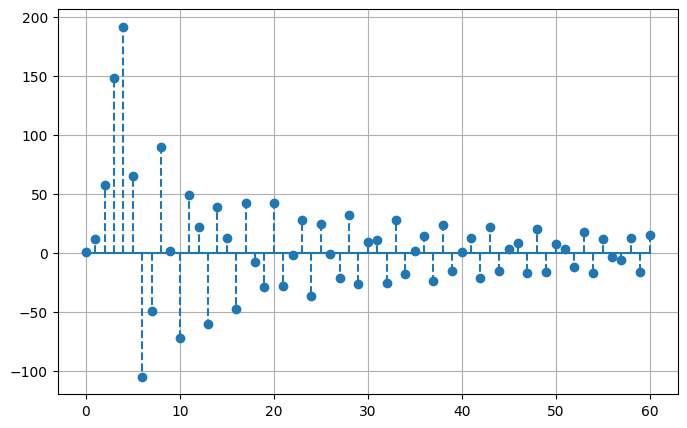

In [4]:
# Импульсная характеристика фильтра

# Входной сигнал
# x = [1.] + 30*[0.]
x = [1., *np.zeros(shape=60)]

# Отклик фильтра на воздействие единичного сигнала x
# Возвращаемое значение:
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# x - массив исходных значений
y = sp.sosfilt(sos=s, x=x)

print('Результаты расчета: ')
print(*list(np.round(a=y, decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(y, linefmt='C0--', basefmt='C0-')
# ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

#### Переходная характеристика фильтра

Результаты расчета: 
1.0 12.763 70.5609 218.6801 410.3685 475.7406 370.745 321.714 411.314 412.5315 340.198 388.9634 410.615 350.3493 389.2835 401.814 354.2989 396.7257 389.2907 360.3603 403.0687 374.6567 373.0039 401.1165 364.4562 389.232 388.3111 366.7137 398.6222 372.2893 381.2628 392.5342 367.259 394.8587 376.5948 378.6264 392.7013 368.9213 392.7789 377.7917 378.8628 391.3802 370.394 392.1222 377.1291 380.6549 389.2325 371.9046 392.0163 375.62 383.3363 386.3089 374.0014 391.5597 374.1743 386.2981 382.7387 377.0502 390.018 373.6814


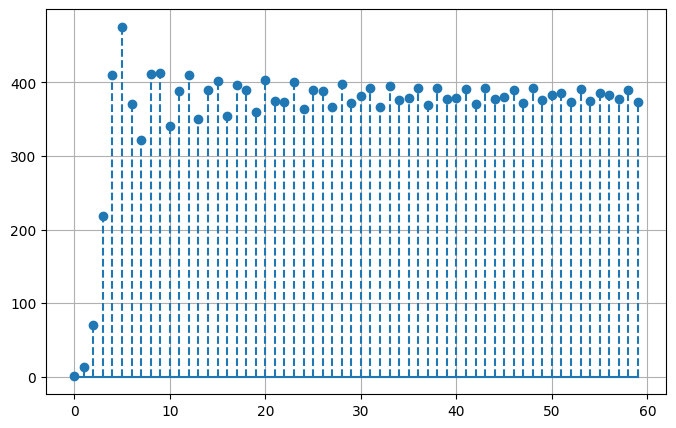

In [5]:
# Переходная характеристика фильтра

# Входной сигнал
x = np.ones(shape=60)

# Отклик фильтра на воздействие входного сигнала x
# Возвращаемое значение:
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# x - массив исходных значений
y = sp.sosfilt(sos=s, x=x)

print('Результаты расчета: ')
print(*list(np.round(a=y, decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(y, linefmt='C0--', basefmt='C0-')
# ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

#### Расчет нулей и полюсов

In [6]:
# Возвращаемые значения:
# z - значения нулей фильтра
# p - значения полюсов фильтра
# k - коэффициент усиления фильтра
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
z, p, k = sp.sos2zpk(sos=s)

print(f'Нули: {z}')
print(f'Полюса: {p}')
print(f'Коэффициент усиления: {k}')

Нули: [-1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
 -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
 -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
 -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
 -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j]
Полюса: [-0.634735 +0.01115705j -0.634735 -0.01115705j -0.6357965+0.03349344j
 -0.6357965-0.03349344j -0.6379235+0.05580867j -0.6379235-0.05580867j
 -0.6411265+0.07808848j -0.6411265-0.07808848j -0.645419 +0.10031607j
 -0.645419 -0.10031607j -0.6508195+0.1224744j  -0.6508195-0.1224744j
 -0.657352 +0.14454532j -0.657352 -0.14454532j -0.6650445+0.1665077j
 -0.6650445-0.1665077j  -0.6739295+0.18832958j -0.6739295-0.18832958j
 -0.6840445+0.20997648j -0.6840445-0.20997648j -0.6954315+0.23141095j
 -0.6954315-0.23141095j -0.708136 +0.2525894j  -0.708136 -0.2525894j
 -0.722207 +0.27345575j -0.722207 -0.27345575j -0.7376985+0.29394544j
 -0.7376985-0.293

In [7]:
# Test 1
print(s[20][:3])
print(s[20][3:])
# sp.tf2zpk(b=s[20][:3], a=s[20][3:])
sp.tf2zpk(b=[1,2,1], a=[1,1.7778,0.9684])

[1.0, 2.0, 1.0]
[1.0, 1.781274, 0.968657]


(array([-1., -1.]), array([-0.8889+0.42220468j, -0.8889-0.42220468j]), 1.0)

In [8]:
# Test 2
print(s[0][:3])
print(s[0][3:])
# sp.tf2zpk(b=s[0][:3], a=[s[0][0],s[0][1],s[0][2]])
sp.tf2zpk(b=s[0][:3], a=[s[0][3],s[0][4],-s[0][5]])
# sp.tf2zpk(b=[1,2,1], a=[1,1.7778,0.9684])

[1.0, 2.0, 1.0]
[1.0, 1.26947, 0.403013]


(array([-1., -1.]), array([-1.53245518,  0.26298518]), 1.0)

#### Диаграмма нулей и полюсов

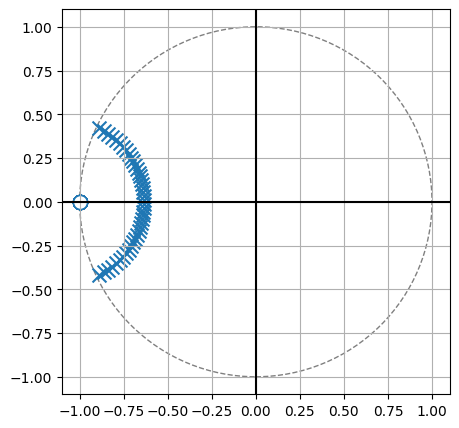

In [9]:
ZerosPolesDiagram(z=z, p=p)

#### Амплитудно-частотная и фазо-частотная характеристики фильтра

In [10]:
# Определяем АЧХ и ФЧХ фильтра

# Функция freqz возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# worN - количество вычисляемых откликов
# whole - False: вычисляется отклик на частоты от 0 до Пи, True: вычисляется отклик на частоты от 0 до 2Пи
# include_nyquist - вычислять отклик для конечной частоты (в данном случае для 2Пи), который по умолчанию не вычисляется
# w, h = sp.sosfreqz(sos=s, worN=512, whole=False)
w, h = sp.sosfreqz(sos=s, worN=512, whole=True)

In [11]:
# Расчет АЧХ по откликам фильтра
fr = FrequencyResponse(h=h)

# Расчет ФЧХ по откликам фильтра
pr = PhaseResponse(h=h)

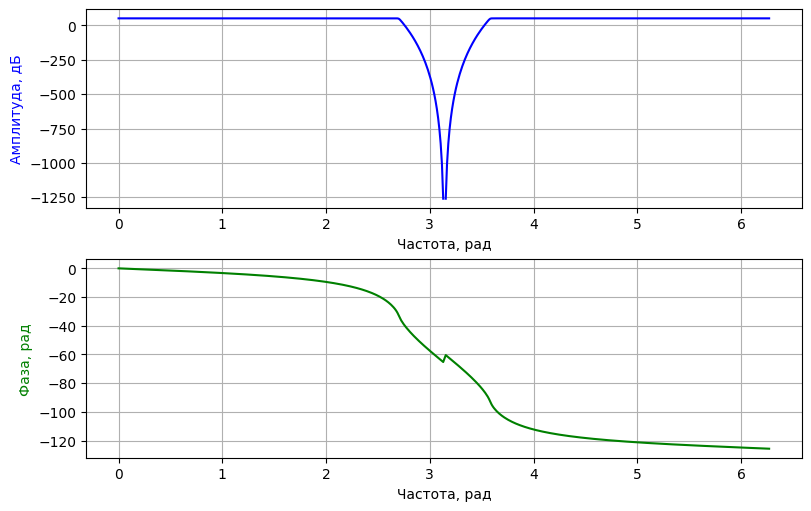

In [12]:
# Графики АЧХ и ФЧХ
FRPRDiagram(w=w, fr=fr, pr=pr)